In [1]:

# Clone your repo (only if not already cloned)
!git clone https://github.com/Abre1234/credit-risk-xai.git

# Go into repo folder
%cd credit-risk-xai
!ls

Cloning into 'credit-risk-xai'...
remote: Enumerating objects: 71, done.
remote: Counting objects: 100% (71/71), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 71 (delta 24), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (71/71), 2.48 MiB | 4.16 MiB/s, done.
Resolving deltas: 100% (24/24), done.
/content/credit-risk-xai
data  notebooks  README.md  requirements.tex


In [2]:

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [3]:

# Path to EDA dataset
eda_file = 'data/processed/credit_data_eda.csv'


# Load dataset
data = pd.read_csv(eda_file)
print("Dataset loaded:", data.shape)
data.head()

Dataset loaded: (32581, 12)


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,target,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


Separate Features and Target

In [4]:

target_col = 'target'

# Features and target
X = data.drop(columns=[target_col])
y = data[target_col]

# Identify categorical and numerical columns
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical columns:", cat_cols)
print("Numerical columns:", num_cols)

Categorical columns: ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
Numerical columns: ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']


Preprocessing Pipeline

In [5]:

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(drop='first'), cat_cols)
    ]
)

# Transform features
X_processed = preprocessor.fit_transform(X)

# Convert to DataFrame
encoded_cat_cols = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_cols)
all_cols = num_cols + list(encoded_cat_cols)

X_processed_df = pd.DataFrame(
    X_processed.toarray() if not isinstance(X_processed, np.ndarray) else X_processed,
    columns=all_cols
)
print("Processed features shape:", X_processed_df.shape)

Processed features shape: (32581, 22)


In [6]:

X_train, X_test, y_train, y_test = train_test_split(
    X_processed_df, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (26064, 22)
Test shape: (6517, 22)


Apply SMOTE (Class Balancing)

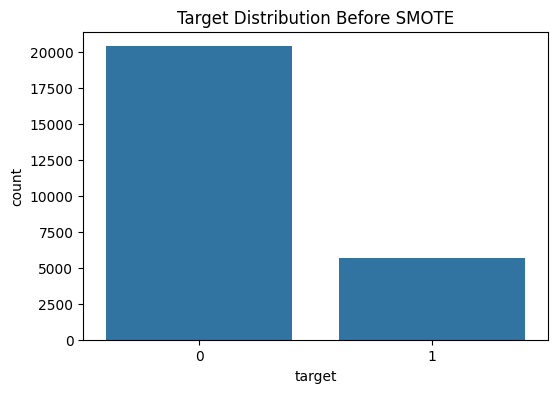

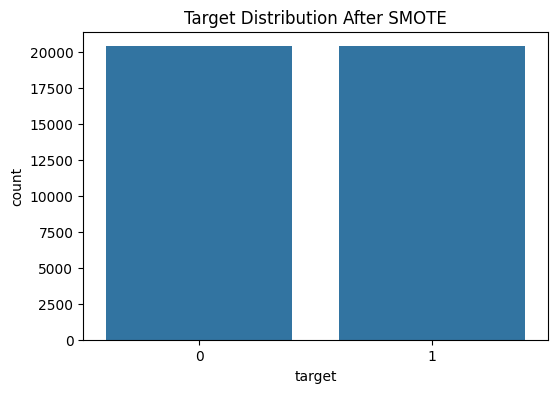

Before SMOTE:
 target
0    20378
1     5686
Name: count, dtype: int64
After SMOTE:
 target
0    20378
1    20378
Name: count, dtype: int64


In [7]:

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Visualize before/after
plt.figure(figsize=(6,4))
sns.countplot(x=y_train)
plt.title("Target Distribution Before SMOTE")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x=y_train_res)
plt.title("Target Distribution After SMOTE")
plt.show()

print("Before SMOTE:\n", y_train.value_counts())
print("After SMOTE:\n", y_train_res.value_counts())

In [8]:

os.makedirs('data/processed', exist_ok=True)

# Save train/test datasets
X_train_res.to_csv('data/processed/X_train_res.csv', index=False)
y_train_res.to_csv('data/processed/y_train_res.csv', index=False)
X_test.to_csv('data/processed/X_test.csv', index=False)
y_test.to_csv('data/processed/y_test.csv', index=False)

print("Processed datasets saved to data/processed/")

Processed datasets saved to data/processed/
